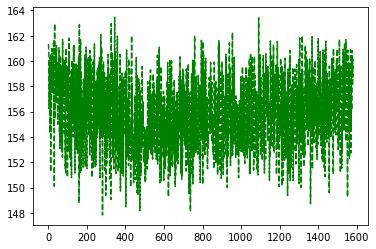

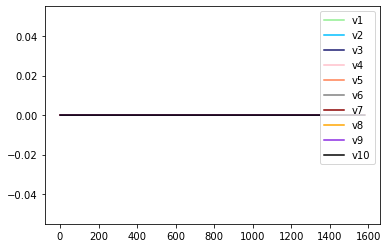

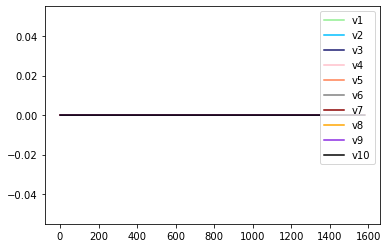

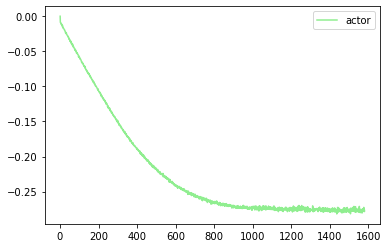

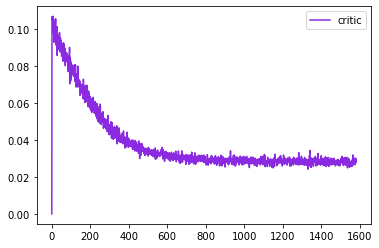

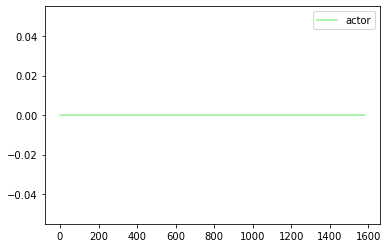

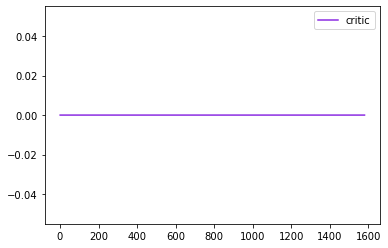

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from File_Name import project_dir, data
from Utilities.FileOperator import load_obj, load_name
import pandas as pd
import json

pd.set_option('display.max_rows', None)

# bandwidth = 3 and datasize = 1024  350
correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1213_Agents/bandwidth_3_datasize_1024_01/2021-12-13-15-45-10-list_file_name.pkl"

# bandwidth = 1 and datasize = 1024 260
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1216_Agents/bandwidth_1_datasize_1024_01/2021-12-16-19-35-03-list_file_name.pkl"
# bandwidth = 2 and datasize = 1024 340
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1216_Agents/bandwidth_2_datasize_1024_01/2021-12-16-19-35-30-list_file_name.pkl"
# bandwidth = 4 and datasize = 1024 360
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1216_Agents/bandwidth_4_datasize_1024_01/2021-12-16-19-35-58-list_file_name.pkl"
# bandwidth = 5 and datasize = 1024 380
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1216_Agents/bandwidth_5_datasize_1024_01/2021-12-16-19-36-41-list_file_name.pkl"

# bandwidth = 3 and datasize = 256  390
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1216_Agents/bandwidth_3_datasize_256_01/2021-12-16-19-34-19-list_file_name.pkl"
# bandwidth = 3 and datasize = 512  390
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1216_Agents/bandwidth_3_datasize_512_01/2021-12-16-19-33-44-list_file_name.pkl"
# bandwidth = 3 and datasize = 2048 300
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1216_Agents/bandwidth_3_datasize_2048_01/2021-12-16-19-31-15-list_file_name.pkl"
# bandwidth = 3 and datasize = 4096 275
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1216_Agents/bandwidth_3_datasize_4096_01/2021-12-16-19-32-59-list_file_name.pkl"


# IAC_GA
# bandwidth = 1 and datasize = 1024 
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1231_IAC_GA/bandwidth_1_datasize_1024_01/2021-12-31-14-59-30-list_file_name.pkl"
# bandwidth = 2 and datasize = 1024
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1231_IAC_GA/bandwidth_2_datasize_1024_01/2021-12-31-15-00-06-list_file_name.pkl"
# bandwidth = 3 and datasize = 512
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1231_IAC_GA/bandwidth_3_datasize_512_01/2021-12-31-15-03-04-list_file_name.pkl"


# C-DDPG
# bandwidth = 1 and datasize = 1024  210
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0111_DDPG/bandwidth_1_datasize_1024/2022-01-12-10-14-28-list_file_name.pkl"
# bandwidth = 2 and datasize = 1024
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0111_DDPG/bandwidth_2_datasize_1024/2022-01-12-10-14-52-list_file_name.pkl"
# bandwidth = 3 and datasize = 1024 310
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0111_DDPG/bandwidth_3_datasize_1024/2022-01-11-20-31-57-list_file_name.pkl"
# bandwidth = 4 and datasize = 1024 320
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0111_DDPG/bandwidth_4_datasize_1024/2022-01-12-10-15-31-list_file_name.pkl"
# bandwidth = 5 and datasize = 1024
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0111_DDPG/bandwidth_5_datasize_1024/2022-01-12-10-15-58-list_file_name.pkl"

# bandwidth = 3 and datasize = 256 400
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0111_DDPG/bandwidth_3_datasize_256/2022-01-12-10-16-30-list_file_name.pkl"
# bandwidth = 3 and datasize = 512
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0111_DDPG/bandwidth_3_datasize_512/2022-01-12-10-17-05-list_file_name.pkl" 
# bandwidth = 3 and datasize = 2048 240
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0111_DDPG/bandwidth_3_datasize_2048/2022-01-12-10-17-30-list_file_name.pkl"
# bandwidth = 3 and datasize = 4096
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0111_DDPG/bandwidth_3_datasize_4096/2022-01-12-10-18-05-list_file_name.pkl"

# IAC
# bandwidth = 1 and datasize = 1024 250
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0113_IAC/bandwidth_1_datasize_1024/2022-01-13-13-22-01-list_file_name.pkl"
# bandwidth = 2 and datasize = 1024 270
# orrect_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0113_IAC/bandwidth_2_datasize_1024/2022-01-13-13-23-35-list_file_name.pkl"
# bandwidth = 3 and datasize = 1024 300
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0113_IAC/bandwidth_3_datasize_1024/2022-01-13-13-24-52-list_file_name.pkl"
# bandwidth = 4 and datasize = 1024  325
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0113_IAC/bandwidth_4_datasize_1024/2022-01-17-09-54-51-list_file_name.pkl"
# bandwidth = 5 and datasize = 1024  355
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0113_IAC/bandwidth_5_datasize_1024/2022-01-17-09-55-19-list_file_name.pkl"

# bandwidth = 3 and datasize = 256
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0113_IAC/bandwidth_3_datasize_256/2022-01-17-09-57-01-list_file_name.pkl"
# bandwidth = 3 and datasize = 512
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0113_IAC/bandwidth_3_datasize_512/2022-01-17-09-57-34-list_file_name.pkl" 
# bandwidth = 3 and datasize = 2048  220
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0113_IAC/bandwidth_3_datasize_2048/2022-01-17-09-58-07-list_file_name.pkl"
# bandwidth = 3 and datasize = 4096  210
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0113_IAC/bandwidth_3_datasize_4096/2022-01-17-09-58-59-list_file_name.pkl"

# 02-05

# bandwidth = 3 and th = 0.15
correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0205_MDR_GBA/bandwidth_3_threshold_15/2022-02-05-11-24-21-list_file_name.pkl"
correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0111_DDPG/2022-05-06-09-13-56-list_file_name.pkl"
# small learning rate
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0205_MDR_GBA/bandwidth_3_threshold_15/2022-02-05-15-53-16-list_file_name.pkl"
#  
# correct_list_file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0205_MDR_GBA/bandwidth_3_threshold_15/2022-02-05-16-16-57-list_file_name.pkl"

list_file = load_obj(name=correct_list_file_name)
init_agent_config = load_obj(load_name(list_file, "init_agent_config_name"))
# print(json.dumps(init_agent_config.__dict__, indent=4, separators=(',', ':')))
csv_file_name = load_name(list_file, 'temple_result_name')
df = pd.read_csv(csv_file_name, names=["Epoch index", "age_of_view", "new_age_of_view", "timeliness", "consistence", "completeness", "intel_arrival_time", "queuing_time", "transmitting_time", "service_time", "service_rate", "received_data", "required_data"], header=0)
epoch_index = df["Epoch index"].values.tolist()
rewards = df["age_of_view"].values.tolist()
new_rewards = df["new_age_of_view"].values.tolist()
# plt.plot(epoch_index, rewards, '-', color='b', label="R")  # s-:方形
plt.plot(epoch_index, new_rewards, '--', color='g', label="NR")  # o-:圆形
plt.show()

csv_file_name = load_name(list_file, 'temple_loss_name')
df = pd.read_csv(csv_file_name, names=["Epoch index",
                                    "Actor of V1", "Actor of V2", "Actor of V3",
                                    "Actor of V4", "Actor of V5", "Actor of V6",
                                    "Actor of V7", "Actor of V8", "Actor of V9",
                                    "Actor of V10",
                                    "Critic of V1", "Critic of V2", "Critic of V3",
                                    "Critic of V4", "Critic of V5", "Critic of V6",
                                    "Critic of V7", "Critic of V8", "Critic of V9",
                                    "Critic of V10",
                                    "Actor of Edge", "Critic of Edge",
                                    "Actor of Reward", "Critic of Reward"], header=0)
df = df[df["Epoch index"] >= 0]


actor_loss_of_v1 = df["Actor of V1"].values.tolist()
actor_loss_of_v2 = df["Actor of V2"].values.tolist()
actor_loss_of_v3 = df["Actor of V3"].values.tolist()
actor_loss_of_v4 = df["Actor of V4"].values.tolist()
actor_loss_of_v5 = df["Actor of V5"].values.tolist()
actor_loss_of_v6 = df["Actor of V6"].values.tolist()
actor_loss_of_v7 = df["Actor of V7"].values.tolist()
actor_loss_of_v8 = df["Actor of V8"].values.tolist()
actor_loss_of_v9 = df["Actor of V9"].values.tolist()
actor_loss_of_v10 = df["Actor of V10"].values.tolist()
plt.plot(epoch_index, actor_loss_of_v1, '-', color='lightgreen', label='v1')
plt.plot(epoch_index, actor_loss_of_v2, '-', color='deepskyblue', label='v2')
plt.plot(epoch_index, actor_loss_of_v3, '-', color='midnightblue', label='v3')
plt.plot(epoch_index, actor_loss_of_v4, '-', color='pink', label='v4')
plt.plot(epoch_index, actor_loss_of_v5, '-', color='coral', label='v5')
plt.plot(epoch_index, actor_loss_of_v6, '-', color='gray', label='v6')
plt.plot(epoch_index, actor_loss_of_v7, '-', color='darkred', label='v7')
plt.plot(epoch_index, actor_loss_of_v8, '-', color='orange', label='v8')
plt.plot(epoch_index, actor_loss_of_v9, '-', color='blueviolet', label='v9')
plt.plot(epoch_index, actor_loss_of_v10, '-', color='black', label='v10')
plt.legend(loc="best")  # 图例
plt.show()


critic_loss_of_v1 = df["Critic of V1"].values.tolist()
critic_loss_of_v2 = df["Critic of V2"].values.tolist()
critic_loss_of_v3 = df["Critic of V3"].values.tolist()
critic_loss_of_v4 = df["Critic of V4"].values.tolist()
critic_loss_of_v5 = df["Critic of V5"].values.tolist()
critic_loss_of_v6 = df["Critic of V6"].values.tolist()
critic_loss_of_v7 = df["Critic of V7"].values.tolist()
critic_loss_of_v8 = df["Critic of V8"].values.tolist()
critic_loss_of_v9 = df["Critic of V9"].values.tolist()
critic_loss_of_v10 = df["Critic of V10"].values.tolist()
plt.plot(epoch_index, critic_loss_of_v1, '-', color='lightgreen', label='v1')
plt.plot(epoch_index, critic_loss_of_v2, '-', color='deepskyblue', label='v2')
plt.plot(epoch_index, critic_loss_of_v3, '-', color='midnightblue', label='v3')
plt.plot(epoch_index, critic_loss_of_v4, '-', color='pink', label='v4')
plt.plot(epoch_index, critic_loss_of_v5, '-', color='coral', label='v5')
plt.plot(epoch_index, critic_loss_of_v6, '-', color='gray', label='v6')
plt.plot(epoch_index, critic_loss_of_v7, '-', color='darkred', label='v7')
plt.plot(epoch_index, critic_loss_of_v8, '-', color='orange', label='v8')
plt.plot(epoch_index, critic_loss_of_v9, '-', color='blueviolet', label='v9')
plt.plot(epoch_index, critic_loss_of_v10, '-', color='black', label='v10')
plt.legend(loc="best")  # 图例
plt.show()

actor_loss_of_edge = df["Actor of Edge"].values.tolist()
plt.plot(epoch_index, actor_loss_of_edge, '-', color='lightgreen', label='actor')
plt.legend(loc="best")  # 图例
plt.show()

critic_loss_of_edge = df["Critic of Edge"].values.tolist()
plt.plot(epoch_index, critic_loss_of_edge, '-', color='blueviolet', label='critic')
plt.legend(loc="best")  # 图例
plt.show()

actor_loss_of_reward = df["Actor of Reward"].values.tolist()
plt.plot(epoch_index, actor_loss_of_reward, '-', color='lightgreen', label='actor')
plt.legend(loc="best")  # 图例
plt.show()

critic_loss_of_reward = df["Critic of Reward"].values.tolist()
plt.plot(epoch_index, critic_loss_of_reward, '-', color='blueviolet', label='critic')
plt.legend(loc="best")  # 图例
plt.show()
